### **Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.offline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
cmap = mpl.colors.ListedColormap(sns.color_palette("husl"))

#### Loading the data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- The dataset does not have any missing values. All columns have 10000 values.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- The describe table shows that Balance and EstimatedSalary have wider ranges than the other variables. 
- For this reason I will standardize the data to bring down all the features to a common scale.
- But for now let's explore the dataset further...

In [5]:
df.describe(include = object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


### **Exploratory Data Analysis**

- Exploratory Data Analysis or as it is commonly referred to, EDA, is important when building machine learning models as it enables you to discover important patterns between variables.



- Before eploring the dataset any further, we will drop some columns that will not play any role in determining whether a customer stayed with the bank or not.

In [6]:
# dropping unnecessary columns 
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.columns

# remanimg exited
df['Churn'] = df['Exited']
df.drop('Exited', axis = 1, inplace = True)

In [7]:
# checking for the number of unique variables in each feature
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Churn                 2
dtype: int64

0    7963
1    2037
Name: Churn, dtype: int64


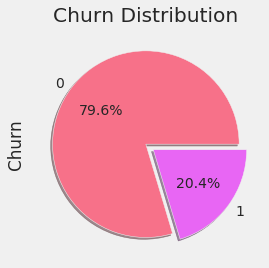

In [8]:
# Checking the balance of the data according to the target column
print(df['Churn'].value_counts())
explode = [0, 0.1]
_=df['Churn'].value_counts().plot(kind = 'pie', autopct ='%.1f%%',  shadow = True, explode = explode, cmap = cmap)
plt.title('Churn Distribution')
plt.show()

- From the plot above, our data is imbalanced. Only 20.4% of the customers got churned while the rest stayed with the bank.
- This makes sense as it is not likely for a bank to have the same number of customers leaving as the number of customers staying.
- It is however not good for our model as most machine learning algorithms used for classification are designed around the assumption of an equal number of examples for each class. 
- Machine learning models will typically over-classify the larger class due to its increased prior probability. As a result, the instances belonging to the smaller class will typically be misclassified more often than those belonging to the larger class.
- Before creating the model we will have to balance te data for a better performance.
- For now lets keep exploring the data and check how the features are correlated with the target column.

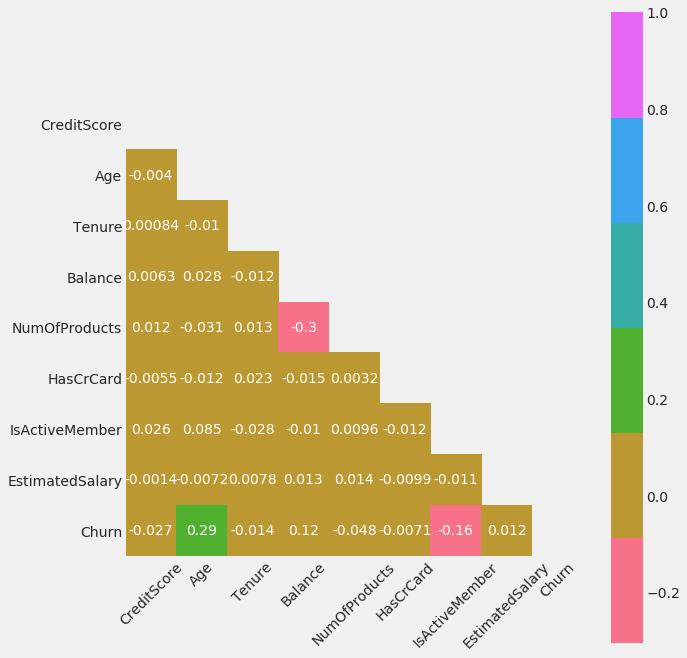

In [9]:
# creating a heatmap to check for collinearity
df_corr = df.corr()
mask = np.triu(df_corr)
_ = sns.heatmap(df_corr, annot = True, square = True, mask = mask, cmap = cmap)
plt.gcf().set_size_inches(10,10)
plt.xticks(rotation = 45)
plt.tight_layout()

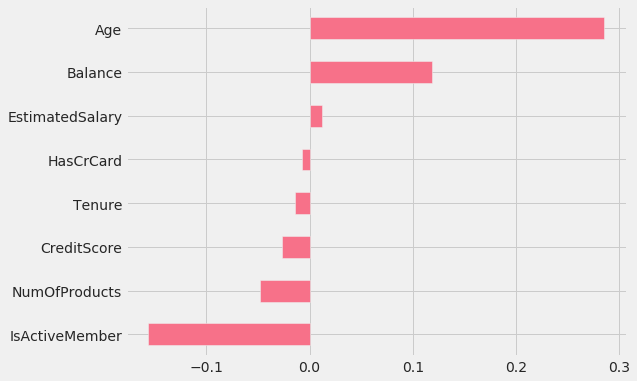

In [10]:
df_corr['Churn'].sort_values().drop('Churn').plot(kind = 'barh', cmap = cmap )
plt.gcf().set_size_inches(8,6)

- The target column seems to have weak correlation with the features in the dataset. Age is the most positively correlated feature with Exited while IsActiveMember is the most negatively correlated feature.
- None of the variables are highly correlated and therefore the data does not have a multicollinearity problem.

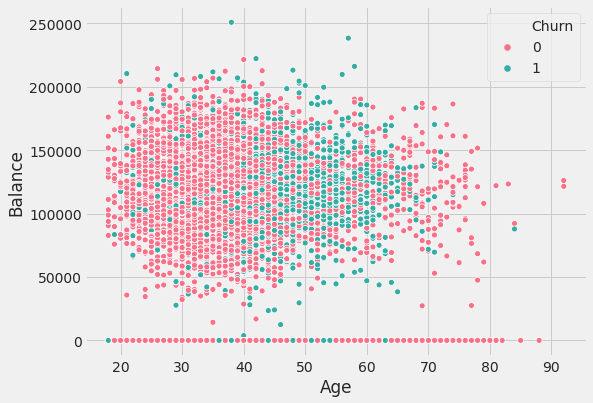

In [11]:
_=sns.scatterplot(x = 'Age', y = 'Balance', data = df, hue = 'Churn', palette = 'husl')
plt.gcf().set_size_inches(8,6)

- The age column contains 70 unique ages.
- To be able to better analyze the age column, I will put the ages in  order to do analysis based on age cohorts. 

In [12]:
# checking the column destribution
display(df['Age'].describe())

# The minimum age is 18 years and the maximum is 90 years
bins = [15, 35, 55, 75, 95]
labels = [1, 2, 3, 4]
df['Age_group'] = pd.cut(df['Age'], bins = bins, labels = labels, include_lowest=True)
df = df.drop('Age', axis = 1)
display(df['Age_group'].describe())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

count     10000
unique        4
top           2
freq       5047
Name: Age_group, dtype: int64

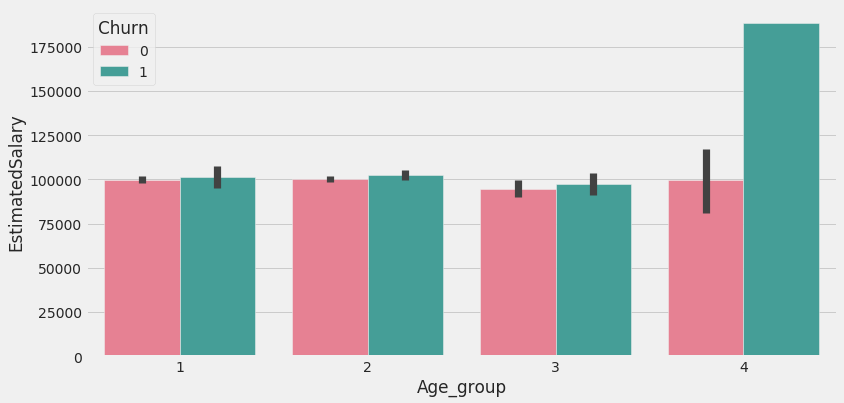

In [13]:
# checking average estimated salary for each age_group
sns.barplot(x = 'Age_group', y = 'EstimatedSalary', data = df, hue = 'Churn', palette = 'husl')
plt.gcf().set_size_inches(12,6)

- The average estimated salary seems to be similar for all age groups between individuals who left the bank and those who stayed apart from age group for that is composed of customers aged between 75 and 95 years.
- I will do further analysis to check the cause of the seemingly unusual data points.

In [14]:
df[(df['Age_group'] == 4) & (df['Churn'] == 1)].tail(10)
display('Out of the {} bank customers belonging in age group 4, only 1 exited'.format(len(df[df['Age_group'] == 4])))

'Out of the 45 bank customers belonging in age group 4, only 1 exited'

- The high churn rate in age group 4 shown by the bar plot is a result of the fact that only one customer in the age group left the bank.

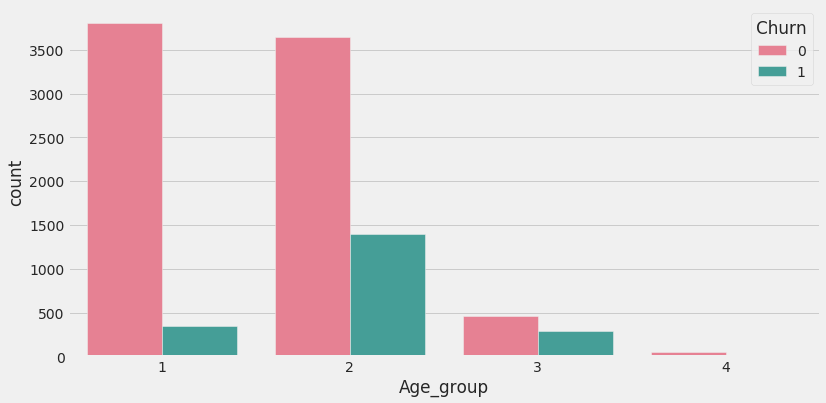

In [15]:
sns.countplot(x = 'Age_group', hue = 'Churn', data = df, palette = 'husl')
plt.gcf().set_size_inches(12,6)

- The retention rate is significantly higher than the churn rate for all age groups.
- The churn rate is highest in age group 2 where customers are aged between 35 and 55 years. This can be explained by the fact that at this age people are engaged in finacial issues alot and tend to move money depending on where they get the best deals.
- The figure also shows that most of the bank customers are in age groups 1 and 2, therefore majority are aged between 18 and 55.

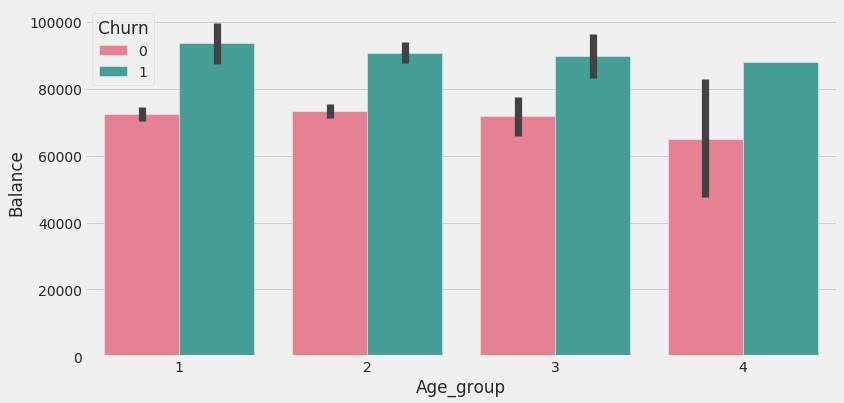

In [16]:
# checking average bank balance for each age_group
sns.barplot(x = 'Age_group', y = 'Balance', data = df, hue = 'Churn', palette = 'husl')
plt.gcf().set_size_inches(12,6)

- For all age groups, customers who left had higher bank balances than those who stayed.
- Remember for group 4, only one customer churned and their balance is higher than the average balance of the remaining customers in the age group.

In [17]:
print('Top 5 customers with the highest bank balances')
print('\n')
display(df.sort_values(by = 'Balance', ascending = False).head())
print('\n')
print('Top 5 customers with the highest estimated salaries')
print('\n')
display(df.sort_values(by = 'EstimatedSalary', ascending = False).head())

Top 5 customers with the highest bank balances




,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Age_group
2092,655,Spain,Male,3,250898.09,3,0,1,81054.00,1,2
3280,583,France,Female,3,238387.56,1,0,1,147964.99,1,3
8733,749,Spain,Male,9,222267.63,1,0,0,101108.85,1,2
3588,489,Spain,Male,3,221532.80,1,1,0,171867.08,0,2
6717,663,Spain,Female,5,216109.88,1,0,1,74176.71,1,3




Top 5 customers with the highest estimated salaries




,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Age_group
6646,685,Spain,Female,2,0.00,2,0,0,199992.48,0,2
3580,639,Germany,Female,5,98635.77,1,1,0,199970.74,0,2
4417,608,Spain,Male,4,153325.10,1,1,1,199953.33,0,1
9096,569,France,Male,9,178755.84,1,1,0,199929.17,0,2
8926,620,France,Male,8,0.00,2,1,1,199909.32,0,1


- Out of the top 5 individuals with the highest bank balances, only one customer stayed with the bank. They all belonged to either age group 1 or 2.
- All top 5 customers with the highest salaries stayed with the bank. They all belonged to either age group 1 or 2.


Male      5457
Female    4543
Name: Gender, dtype: int64

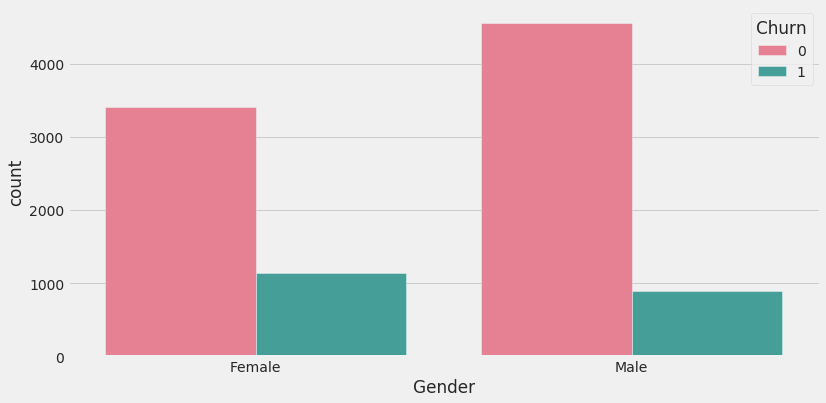

In [18]:
# checking the churn rate between males and females
sns.countplot(x = 'Gender', hue = 'Churn', data = df, palette = 'husl')
plt.gcf().set_size_inches(12,6)
df['Gender'].value_counts()

- The genders of the bank customers are fairly balanced. The churn rate seems to be higher amon females than in males

### **Constructing the Model**



- Before constructing the model we need to convert the categorical features in our model to numerical features.
- It is also important to standardize our data to make out model faster and more accurate.

- The Geography and Gender columns are categorical and we need to convert the data to a numerical feature and this can be done using the LabelEncoder from scikit learn which encodes variables without increasing the number of columns.

In [19]:
# Encoding the geography column
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Age_group
0,619,0,0,2,0.00,1,1,1,101348.88,1,2
1,608,2,0,1,83807.86,1,0,1,112542.58,0,2
2,502,0,0,8,159660.80,3,1,0,113931.57,1,2
3,699,0,0,1,0.00,2,0,0,93826.63,0,2
4,850,2,0,2,125510.82,1,1,1,79084.10,0,2


- Our data is still imbalanced which means we have to balance it before creating a model.
- But first let's use our data as it is to see how the model performs.

In [20]:
# splitting the data
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101, stratify = y)

# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2389
           1       0.58      0.11      0.19       611

    accuracy                           0.80      3000
   macro avg       0.70      0.55      0.54      3000
weighted avg       0.76      0.80      0.75      3000





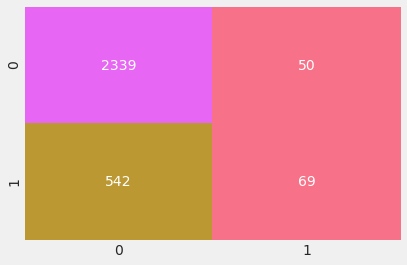

In [21]:
# creating the model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print('\n')
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = cmap, cbar = False, fmt = 'g')

- The logistic regression model got an accuracy of 80% even though most of the data points belonging to class 1 were wrongly classified because it predicted that most of the data belongs to the majority class.
- The next step is to balance the dataset to see if the classification dataset as well as the accuracy of the model improve.

### **Balancing the data**

- There are several methods we can use to balance our data and improve model performance.
- The first one we will use is the Undersampling method  

#### Undersampling

- The undersampling technique balances uneven datasets by retaining all the data in the minority class and reducing the size of the majority class.
- While the method effectively balances the data, it involves dropping alot of data that could be useful in creating a predictive method.
- Let's balance the data to see how the model performs

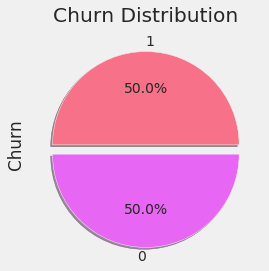

In [22]:
# putting the training data together
train_df = pd.concat([X_train, y_train], axis = 1)

# undersampling the data
shuffled_train_df = train_df.sample(frac = 1, random_state = 42)
churn_df = shuffled_train_df[shuffled_train_df['Churn'] == 1]
retained_df = shuffled_train_df[shuffled_train_df['Churn'] == 0].sample(n = len(churn_df))
undersampled_df = pd.concat([churn_df, retained_df])

# plotting the resampled data
explode = [0, 0.1]
_=undersampled_df['Churn'].value_counts().plot(kind = 'pie', autopct ='%.1f%%',  shadow = True, explode = explode, cmap = cmap)
plt.title('Churn Distribution')
plt.show()

- The target classes in the training data are now balanced. Lets now see how the model performs this time. 

#### Recreating the model

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      2389
           1       0.30      0.72      0.43       611

    accuracy                           0.61      3000
   macro avg       0.60      0.65      0.56      3000
weighted avg       0.77      0.61      0.64      3000



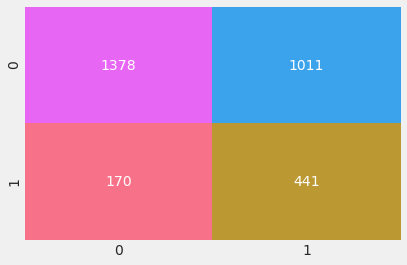

In [23]:
# rescaling the data
X_train = undersampled_df.drop('Churn', axis = 1)
y_train = undersampled_df['Churn']
X_train_sc = scaler.fit_transform(X_train)

# creating the model
logreg.fit(X_train_sc, y_train)
y_pred = logreg.predict(X_test_scaled)

# checking the performance
print(classification_report(y_test, y_pred))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = cmap, cbar = False, fmt = 'g')